In [38]:
import pandas as pd
import numpy as np
import backtrader as bt
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
%matplotlib inline
sns.set()
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.figsize'] = 18,9
pd.set_option('display.max_colwidth', -1)
pd.plotting.register_matplotlib_converters()
#plt.style.use('fivethirtyeight')

In [40]:
class St(bt.Strategy):
    def __init__(self):
        self.ema = bt.indicators.ExponentialMovingAverage(self.data)
        self.bol = bt.indicators.BollingerBands(self.data)

In [41]:
ticker = 'AAPL'

In [45]:
end = datetime.now()
start = datetime(end.year - 3, end.month , end.day)

In [46]:
data = bt.feeds.GenericCSVData(
        fromdate=start,
        todate=end,
        dataname=(f"../data/ticks/{ticker}.csv"),
        dtformat=('%Y-%m-%d'),
        openinterest=-1,
        nullvalue=0.0,
        plot=True
    )

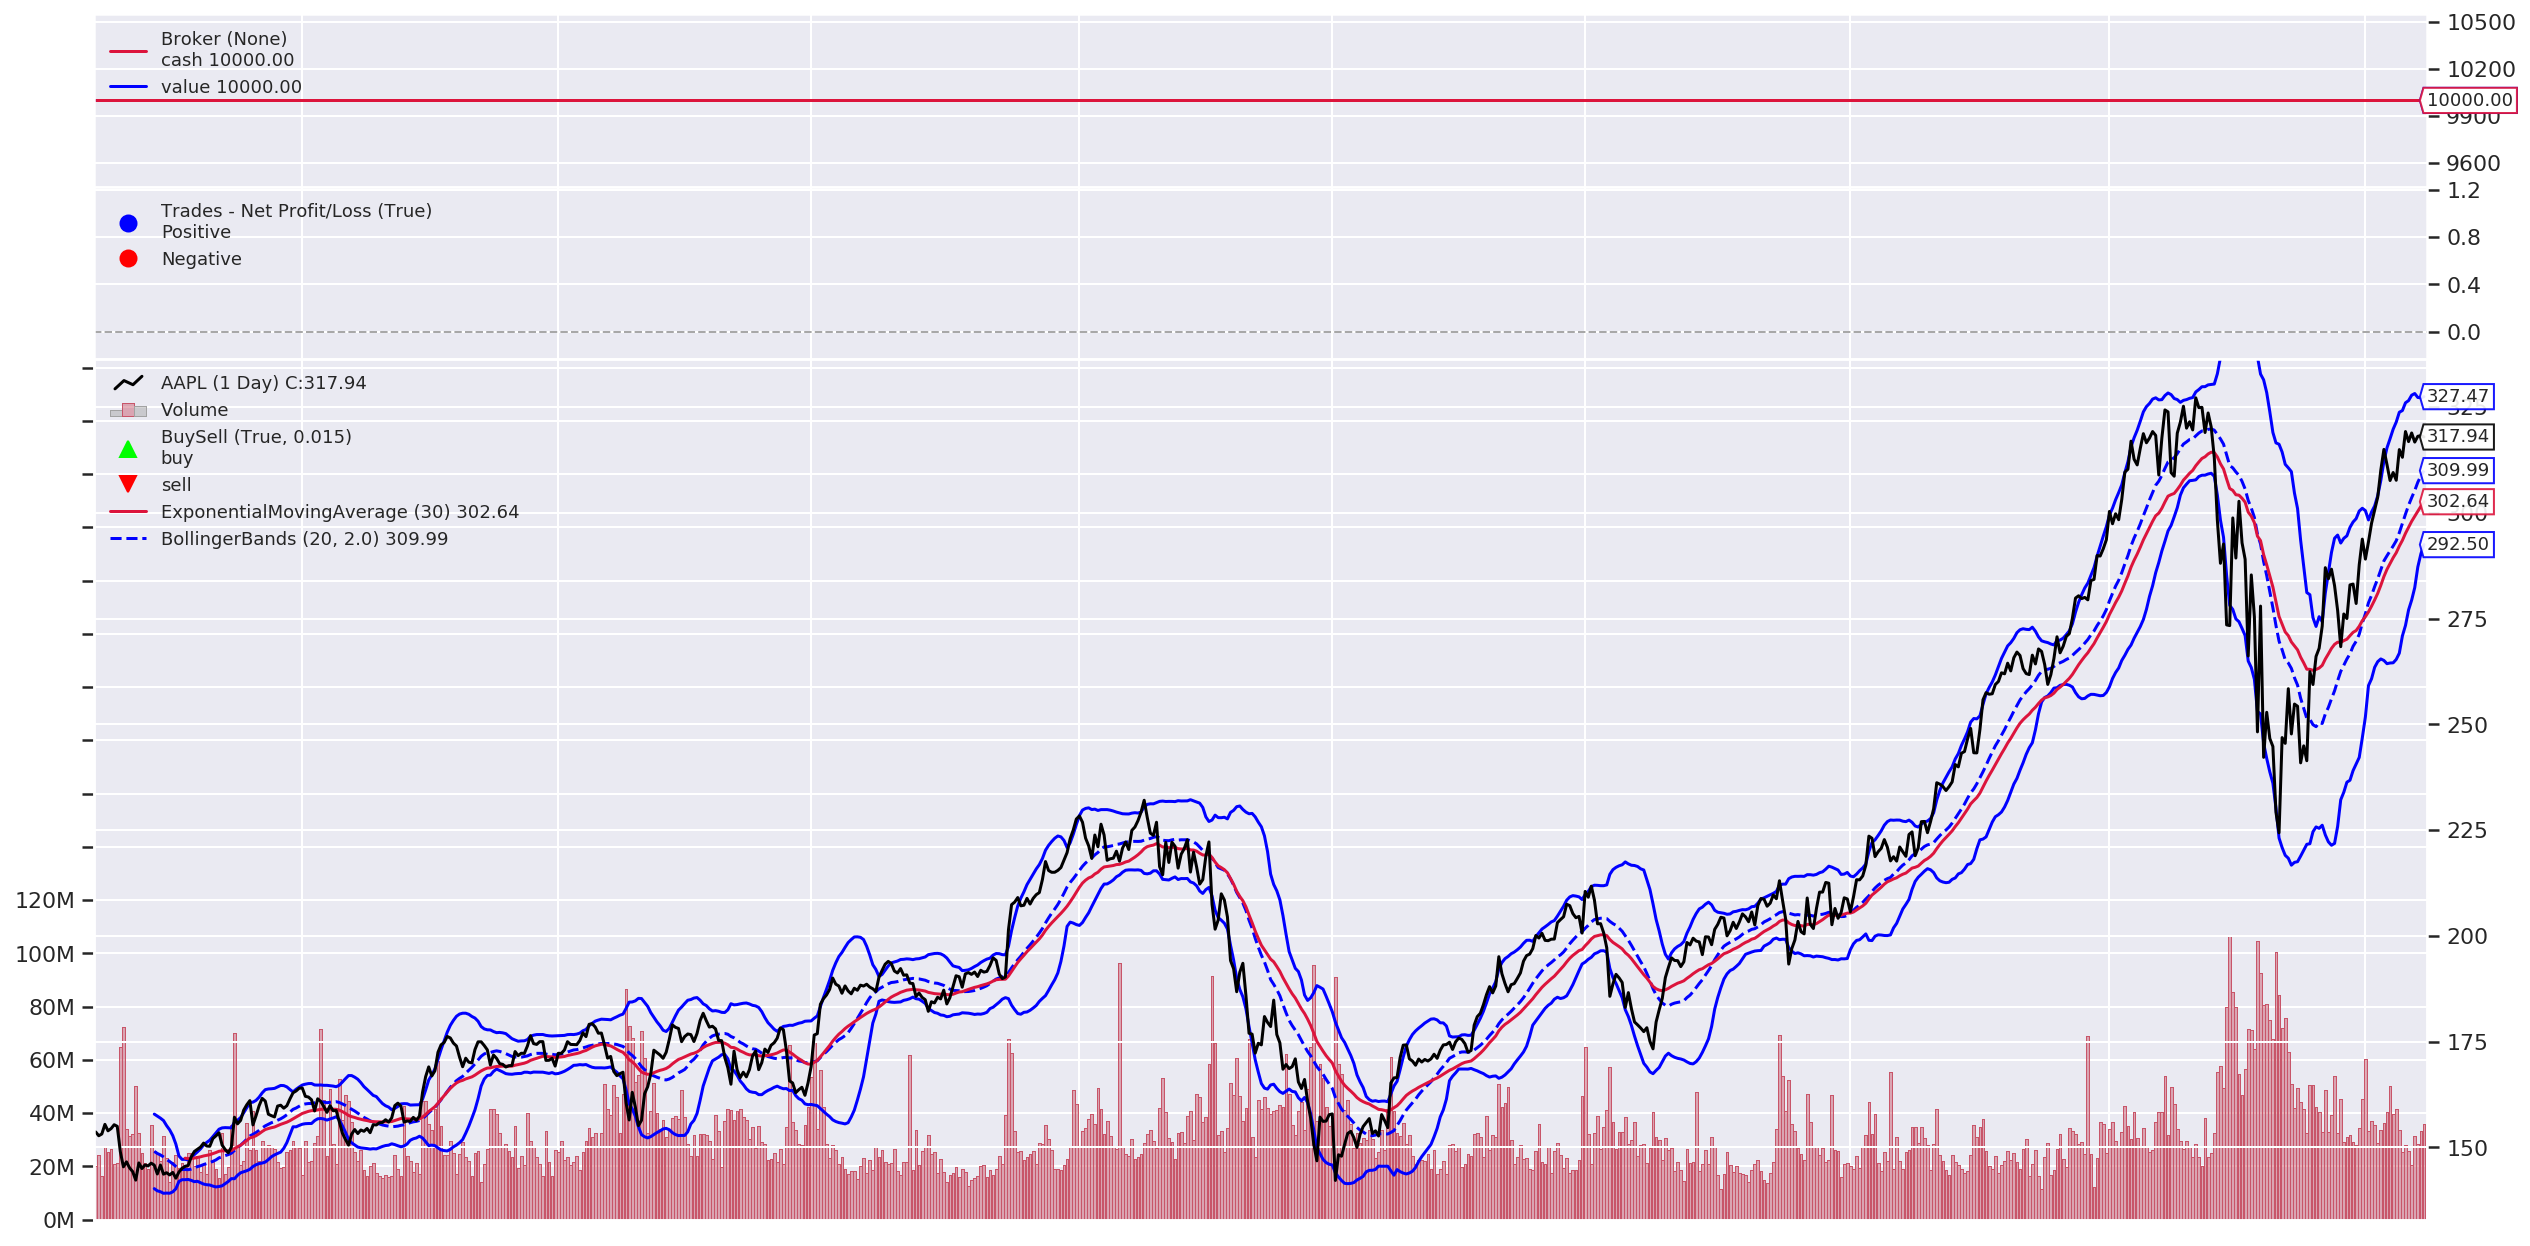

CPU times: user 1.78 s, sys: 227 ms, total: 2.01 s
Wall time: 1.65 s


[[<Figure size 1296x648 with 4 Axes>]]

In [47]:
%%time
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(St)
cerebro.run()
cerebro.plot(iplot=False)